In [180]:
import pandas as pd
import numpy as np
import os

In [181]:
os.getcwd()

df = pd.read_csv(r'C:\Users\agrand6\Desktop\UIC\Code\house_prices\train.csv')
df_test = pd.read_csv(r'C:\Users\agrand6\Desktop\UIC\Code\house_prices\test.csv')

In [182]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [183]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [184]:
print(df.isnull().sum().sort_values(ascending=False))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


<AxesSubplot:>

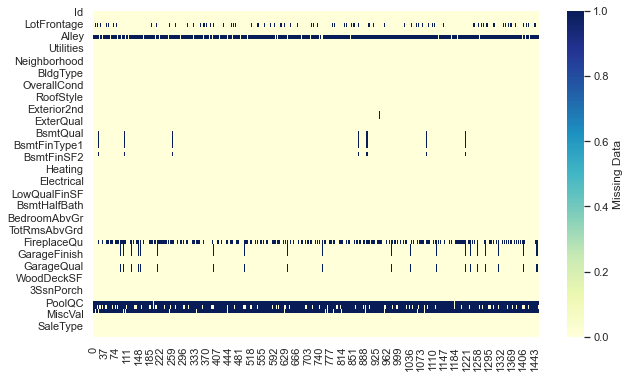

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [186]:
#checking where SalePrice is NA
df['SalePrice'].isnull().sum()



0

In [187]:
# dropping all the rows where SalePrice is NA.

#target = 'SalePrice'
#df.dropna(axis =0, subset = [target], inplace = True)

def missingValuesInfo(x):
    total = x.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(x)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]


In [188]:
missingValuesInfo(df)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [189]:
missingValuesInfo(df_test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageYrBlt,78,5.35
GarageQual,78,5.35
GarageFinish,78,5.35
GarageCond,78,5.35


In [190]:
# removing the columns which have empty values > 70%

df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace = True)
df_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace = True)

<AxesSubplot:>

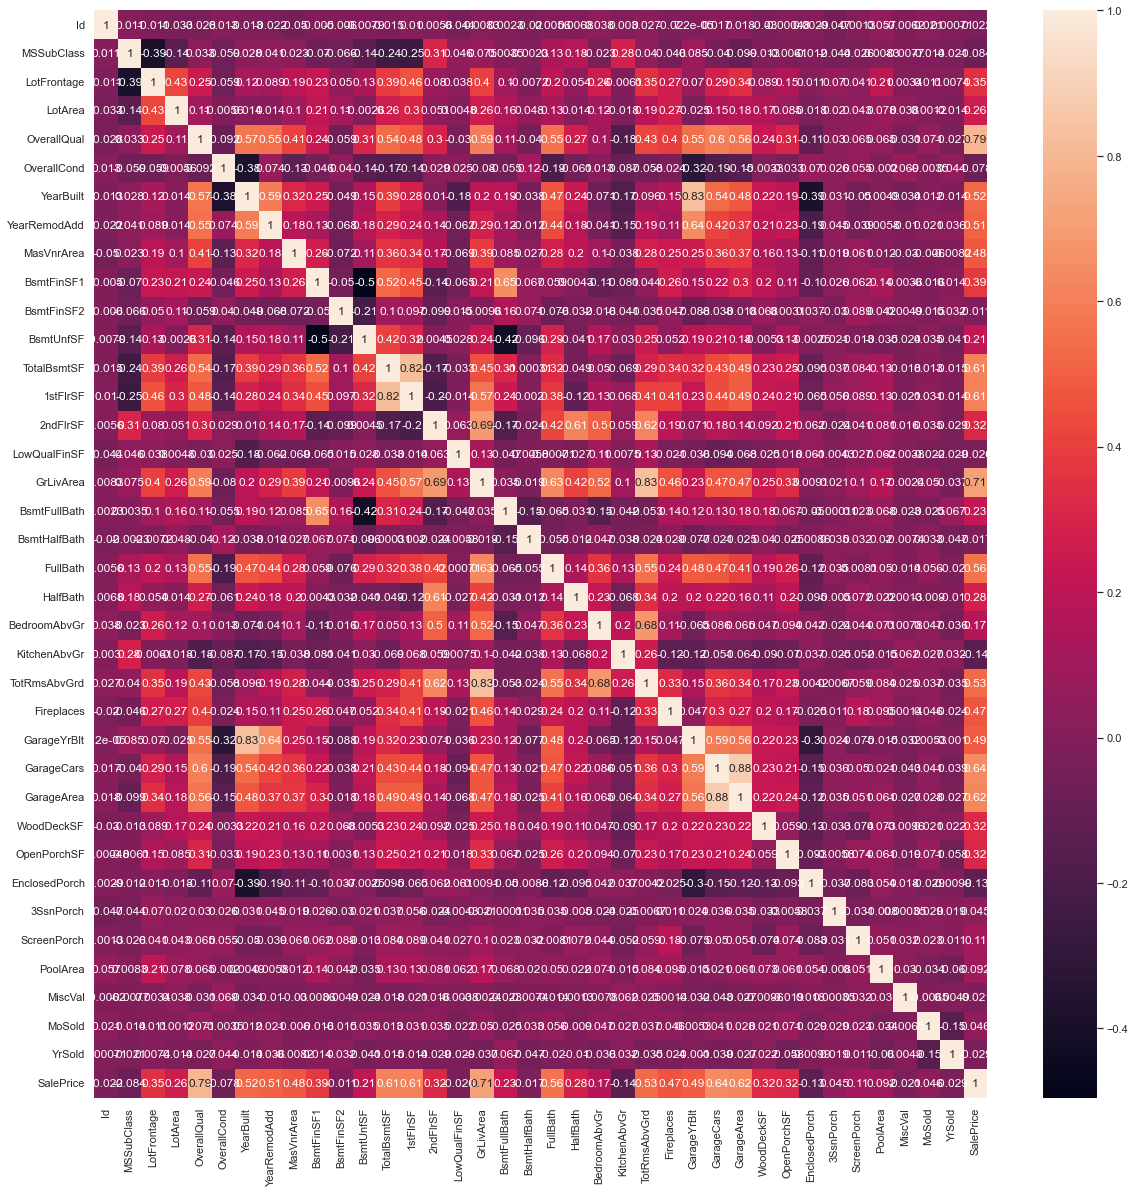

In [191]:

df.shape

df.head()

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot= True)


In [192]:

#Here we can see some strong corelation between variables such as Garage Year built, Year built; Total basment sqft, First floor sq ft, Garage Cars, garage area.

#This correlation is so strong that it can indicate a situation of multicollinearity.

#If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

for a in range(len(df.corr().columns)):
    for b in range(a):
        if(abs(df.corr().iloc[a,b])>0.7):
            print(df.corr().columns[a],"-", df.corr().columns[b])
            #print(df.corr().columns)


1stFlrSF - TotalBsmtSF
TotRmsAbvGrd - GrLivArea
GarageYrBlt - YearBuilt
GarageArea - GarageCars
SalePrice - OverallQual
SalePrice - GrLivArea


In [193]:

#These columns are the most corelated. We can drop one of each of the columns to avoid multi collenarity.

df.drop(['TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd'], axis=1, inplace=True)
df_test.drop(['TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd'], axis=1, inplace=True)
df.shape


(1460, 73)

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

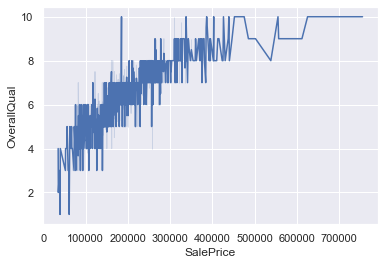

In [194]:

sns.lineplot(data=df, x="SalePrice", y= "OverallQual")

C:\Users\agrand6\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


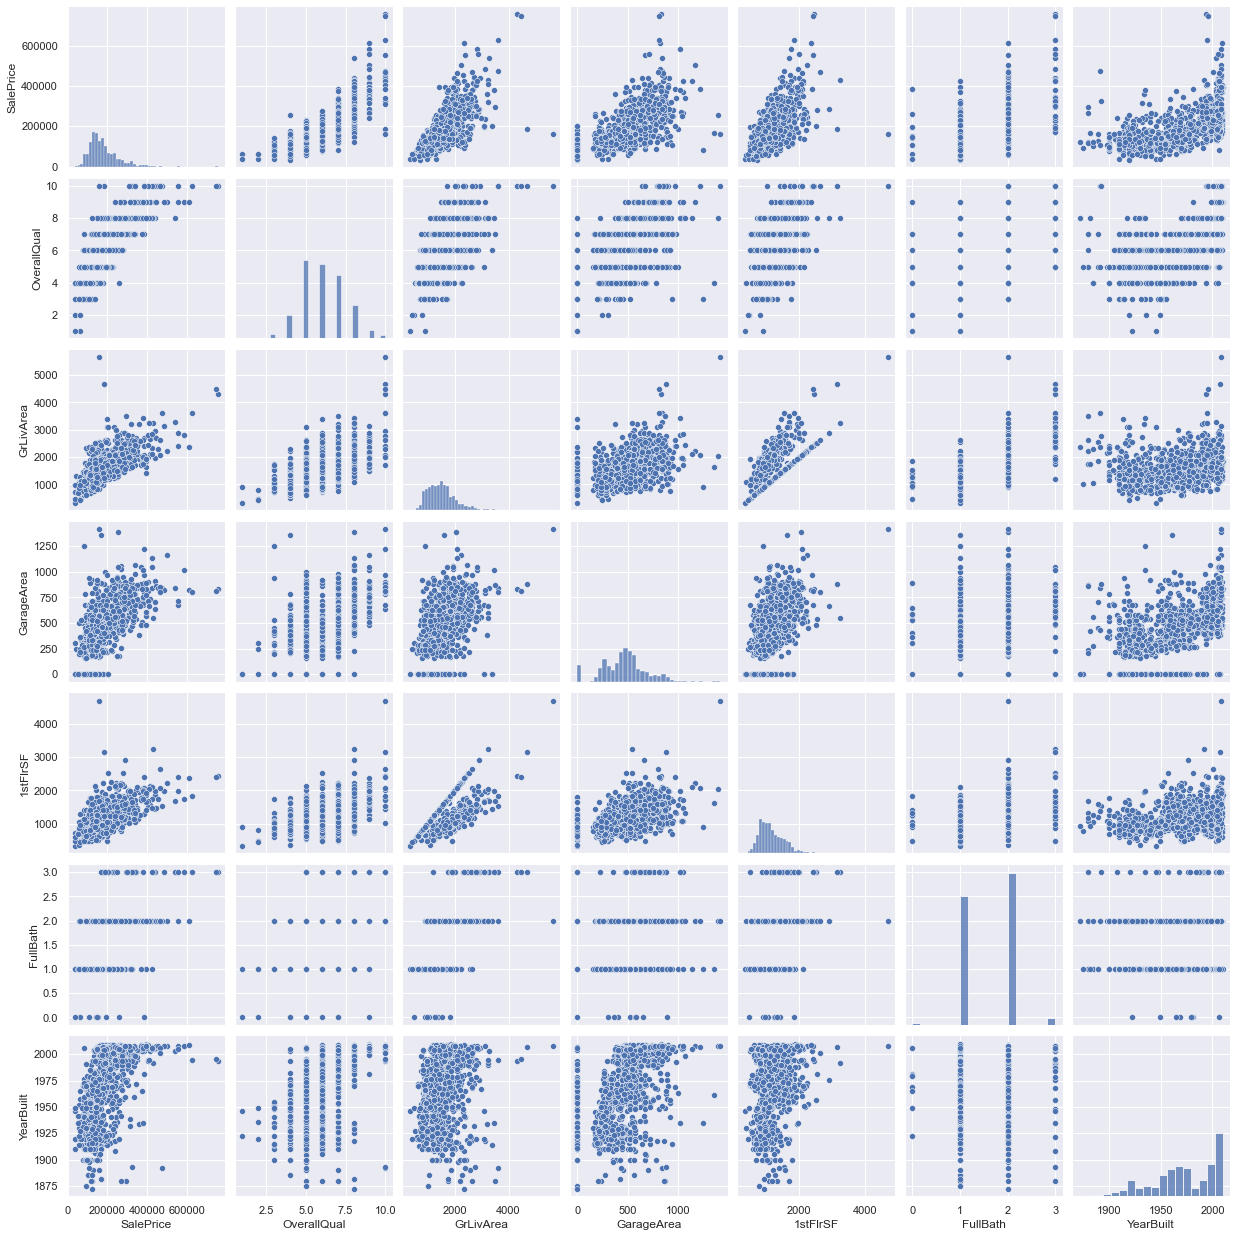

In [195]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

<AxesSubplot:>

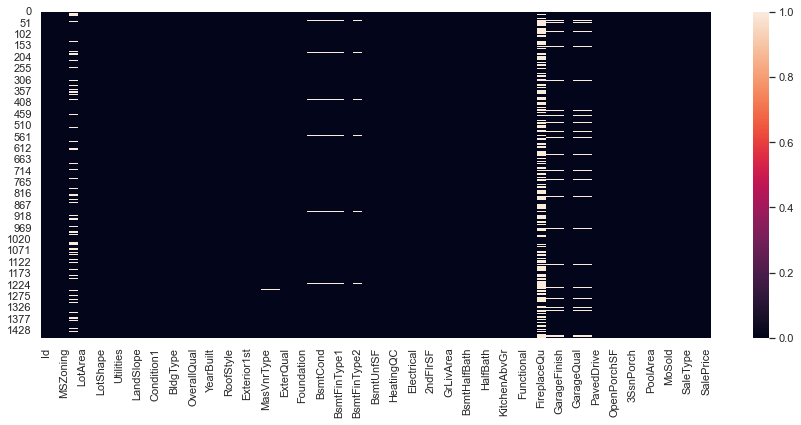

In [196]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())

In [197]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [198]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])

In [199]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 73, dtype: int64

In [200]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [201]:
missingValuesInfo(df)

,Total,Percent
GarageType,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
BsmtFinType2,38,2.60
BsmtExposure,38,2.60
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtFinType1,37,2.53
MasVnrArea,8,0.55


In [202]:
missingValuesInfo(df_test)

,Total,Percent
GarageFinish,78,5.35
GarageQual,78,5.35
GarageCond,78,5.35
GarageType,76,5.21
BsmtCond,45,3.08
BsmtQual,44,3.02
BsmtExposure,44,3.02
BsmtFinType2,42,2.88
BsmtFinType1,42,2.88
MasVnrType,16,1.10


In [203]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageQual'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageCond'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [204]:
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageQual'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageCond'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [205]:
missingValuesInfo(df)

,Total,Percent
BsmtFinType2,38,2.60
BsmtExposure,38,2.60
BsmtCond,37,2.53
BsmtFinType1,37,2.53
BsmtQual,37,2.53
MasVnrType,8,0.55
MasVnrArea,8,0.55
Electrical,1,0.07


In [206]:
#df.dtypes['BsmtFinType2']
#df.dtypes['BsmtExposure']
#df.dtypes['BsmtCond']
#df.dtypes['BsmtQual']
#df.dtypes['MasVnrType']
#df.dtypes['Electrical']
#df.dtypes['MSSubClass']

In [207]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [208]:
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])

<AxesSubplot:>

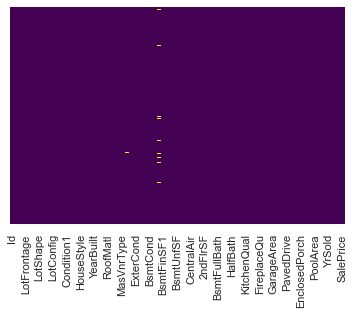

In [209]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [210]:
missingValuesInfo(df)

,Total,Percent
BsmtFinType1,37,2.53
MasVnrArea,8,0.55


In [211]:
missingValuesInfo(df_test)

,Total,Percent
BsmtFinType1,42,2.88
MasVnrArea,15,1.03
MSZoning,4,0.27
Functional,2,0.14
BsmtHalfBath,2,0.14
Utilities,2,0.14
BsmtFullBath,2,0.14
Exterior1st,1,0.07
KitchenQual,1,0.07
GarageArea,1,0.07


In [212]:
#df.dtypes['BsmtFinType1']
df.dtypes['MasVnrArea']

dtype('float64')

In [213]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])

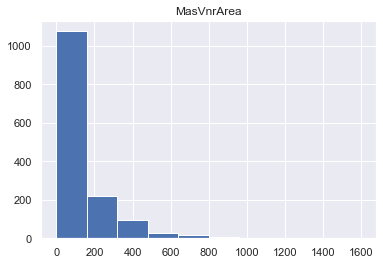

In [214]:
df.hist(column='MasVnrArea');

In [215]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])

<AxesSubplot:>

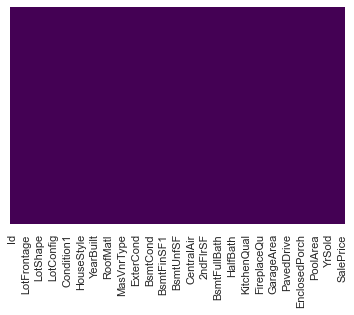

In [216]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [217]:
missingValuesInfo(df_test)

,Total,Percent
MSZoning,4,0.27
Functional,2,0.14
BsmtHalfBath,2,0.14
BsmtFullBath,2,0.14
Utilities,2,0.14
BsmtUnfSF,1,0.07
Exterior1st,1,0.07
KitchenQual,1,0.07
GarageArea,1,0.07
Exterior2nd,1,0.07


In [218]:
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mode()[0])
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mode()[0])
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

In [219]:
missingValuesInfo(df_test)
missingValuesInfo(df)

,Total,Percent


In [220]:
df.shape

(1460, 73)

In [221]:
df_test.shape

(1459, 72)

In [222]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [223]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [224]:
# joining both the test and train datasets

final_df=pd.concat([df,df_test],axis=0)

In [225]:
final_df['SalePrice']
# We see only 1458 rows, since the df_test doen't have any 

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [226]:
final_df.shape

(2919, 73)

In [227]:
## Here each of the categorical variables has more than 2 categories. 
## Hence, it is better to use dummy variables and create new varaibles, rather than using as.numeric 

In [228]:
cat_cols = final_df.select_dtypes(include=['object']).columns.tolist()

print(cat_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [229]:
len(cat_cols)

39

In [230]:
## create dummies

In [231]:
scam_df = pd.get_dummies(final_df, columns=cat_cols)

In [232]:
scam_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [233]:
non_dummy_cols = list(set(final_df.columns) - set(cat_cols))

In [234]:
non_dummy_cols

['FullBath',
 'ScreenPorch',
 'MSSubClass',
 'BsmtFinSF2',
 'LotArea',
 'OverallCond',
 'LowQualFinSF',
 'GarageArea',
 '2ndFlrSF',
 'PoolArea',
 'OpenPorchSF',
 'GrLivArea',
 'MiscVal',
 'YearBuilt',
 'SalePrice',
 '1stFlrSF',
 'BsmtFinSF1',
 'MasVnrArea',
 'MoSold',
 'LotFrontage',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'HalfBath',
 'OverallQual',
 'WoodDeckSF',
 '3SsnPorch',
 'Fireplaces',
 'BsmtHalfBath',
 'Id',
 'KitchenAbvGr',
 'YrSold',
 'YearRemodAdd',
 'BsmtFullBath',
 'EnclosedPorch']

In [235]:
len(non_dummy_cols) 
# 33 is total (72) - cat_cols (39)

34

In [236]:
final_df[non_dummy_cols]

,FullBath,ScreenPorch,MSSubClass,BsmtFinSF2,LotArea,OverallCond,LowQualFinSF,GarageArea,2ndFlrSF,PoolArea,...,WoodDeckSF,3SsnPorch,Fireplaces,BsmtHalfBath,Id,KitchenAbvGr,YrSold,YearRemodAdd,BsmtFullBath,EnclosedPorch
0,2,0,60,0.0,8450,5,0,548.0,854,0,...,0,0,0,0.0,1,1,2008,2003,1.0,0
1,2,0,20,0.0,9600,8,0,460.0,0,0,...,298,0,1,1.0,2,1,2007,1976,0.0,0
2,2,0,60,0.0,11250,5,0,608.0,866,0,...,0,0,1,0.0,3,1,2008,2002,1.0,0
3,1,0,70,0.0,9550,5,0,642.0,756,0,...,0,0,1,0.0,4,1,2006,1970,1.0,272
4,2,0,60,0.0,14260,5,0,836.0,1053,0,...,192,0,1,0.0,5,1,2008,2000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,0,160,0.0,1936,7,0,0.0,546,0,...,0,0,0,0.0,2915,1,2006,1970,0.0,0
1455,1,0,160,0.0,1894,5,0,286.0,546,0,...,0,0,0,0.0,2916,1,2006,1970,0.0,0
1456,1,0,20,0.0,20000,7,0,576.0,0,0,...,474,0,1,0.0,2917,1,2006,1996,1.0,0
1457,1,0,85,0.0,10441,5,0,0.0,0,0,...,80,0,0,1.0,2918,1,2006,1992,0.0,0


In [237]:
scam_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [238]:
ash_df = pd.concat([final_df[non_dummy_cols], scam_df] , axis =1)
print(ash_df)

      FullBath  ScreenPorch  MSSubClass  BsmtFinSF2  LotArea  OverallCond  \
0            2            0          60         0.0     8450            5   
1            2            0          20         0.0     9600            8   
2            2            0          60         0.0    11250            5   
3            1            0          70         0.0     9550            5   
4            2            0          60         0.0    14260            5   
...        ...          ...         ...         ...      ...          ...   
1454         1            0         160         0.0     1936            7   
1455         1            0         160         0.0     1894            5   
1456         1            0          20         0.0    20000            7   
1457         1            0          85         0.0    10441            5   
1458         2            0          60         0.0     9627            5   

      LowQualFinSF  GarageArea  2ndFlrSF  PoolArea  ...  SaleType_ConLw  \


In [239]:
ash_df['SalePrice']

,SalePrice,SalePrice
0,208500.0,208500.0
1,181500.0,181500.0
2,223500.0,223500.0
3,140000.0,140000.0
4,250000.0,250000.0
...,...,...
1454,NaN,NaN
1455,NaN,NaN
1456,NaN,NaN
1457,NaN,NaN


In [240]:
ash_df = ash_df.loc[:,~ash_df.columns.duplicated()]

In [241]:
ash_df.shape

(2919, 278)

In [242]:
ash_df.head()

,FullBath,ScreenPorch,MSSubClass,BsmtFinSF2,LotArea,OverallCond,LowQualFinSF,GarageArea,2ndFlrSF,PoolArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2,0,60,0.0,8450,5,0,548.0,854,0,...,0,0,0,1,0,0,0,0,1,0
1,2,0,20,0.0,9600,8,0,460.0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,0,60,0.0,11250,5,0,608.0,866,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,70,0.0,9550,5,0,642.0,756,0,...,0,0,0,1,1,0,0,0,0,0
4,2,0,60,0.0,14260,5,0,836.0,1053,0,...,0,0,0,1,0,0,0,0,1,0


In [243]:
ash_Train = ash_df.iloc[:1460,:]
ash_Test = ash_df.iloc[1460:,:]

In [244]:
ash_Train.head()
ash_Train.shape

(1460, 278)

In [245]:
ash_Test.head()
ash_Test.shape

(1459, 278)

In [246]:
ash_Train['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [247]:
ash_Test['SalePrice']

# We can see the test data does not have any values in the Sale Price column

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, Length: 1459, dtype: float64

In [248]:
x_train = ash_Train.drop(['SalePrice'], axis =1)
y_train = ash_Train['SalePrice']

In [249]:
x_test = ash_Test.drop(['SalePrice'], axis =1)
y_test = ash_Test['SalePrice']

In [261]:
y_test.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: SalePrice, dtype: float64

In [250]:
## Normalize the train data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
x_train_normal = my_imputer.fit_transform(x_train)
X_test_normal = my_imputer.transform(x_test)



In [254]:
ash_Test.head()
x_kaggle_test = my_imputer.fit_transform(ash_Test)

In [255]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [256]:
## Let's create a xgboost model

from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(x_train_normal, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [262]:
predictions = my_model.predict(x_test)

#from sklearn.metrics import mean_absolute_error
#print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

In [263]:
## Hyper parameter Optimization
np.random.seed(699)

## Parameter setting
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'booster':booster,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'base_score':base_score
    }


In [264]:
np.random.seed(699)

import xgboost
regressor=xgboost.XGBRegressor()

from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator = regressor,
                               param_distributions = hyperparameter_grid,
                               cv = 5, n_iter = 50,
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = 4, verbose = 5,
                               return_train_score = True,
                               random_state = 42)



In [265]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   param

In [266]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [267]:
## taking the best estiamtor from the random_cv to perform modelling

cv_regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [268]:
cv_regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [269]:
predictions = cv_regressor.predict(x_test)

from sklearn.metrics import mean_absolute_error
#print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

In [270]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(cv_regressor, open(filename, 'wb'))

In [271]:
y_pred = cv_regressor.predict(x_test)
y_pred

array([123201.21, 164860.03, 185981.33, ..., 165054.81, 120304.96,
       210006.9 ], dtype=float32)

In [272]:
y_pred_kaggle = cv_regressor.predict(x_kaggle_test)
y_pred_kaggle

array([123201.21, 164860.03, 185981.33, ..., 165054.81, 120304.96,
       210006.9 ], dtype=float32)

In [283]:
## Edting the y_pred, for sumbitting the prediction file in the kaggle competition

final_predictions = pd.DataFrame(y_pred_kaggle)
sub_df = pd.read_csv(r'C:\Users\agrand6\Desktop\UIC\Code\house_prices\sample_submission.csv')
datasets = pd.concat([sub_df['Id'],final_predictions],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv(r'C:\Users\agrand6\Desktop\UIC\Code\house_prices\final_submission.csv',index=False)